# NBA - Machine Learning Classification

#### João Vitor de Paiva Marcotti
#### Electrical Engineer - State University of Maringá - UEM (Brazil)
#### 8th Semester Economics Student - Cesumar University - UniCesumar (Brazil)
#### Open to Work
#### Contact: joaovmarcotti@hotmail.com

# ---------------------------------------------------------------------------------------------------------------

In [50]:
# Import the Pandas, Matplotlib, Numpy and Seaborn libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns

In [51]:
# Import the dataframe from a .csv file
df = pd.read_csv(r'C:\Users\joaov\OneDrive\Documents\Curso - PA Analytics\archive\csv\game.csv')
df

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,2,0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51,-5,0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,-6,0
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47,-16,0
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,22022,1610612755,PHI,Philadelphia 76ers,22201016,2023-03-12 00:00:00,PHI vs. WAS,W,240,41.0,...,29.0,35.0,19.0,4.0,5.0,10.0,20.0,93,-19,1
62363,22022,1610612759,SAS,San Antonio Spurs,22201018,2023-03-12 00:00:00,SAS vs. OKC,L,240,33.0,...,43.0,55.0,26.0,8.0,3.0,9.0,19.0,102,12,1
62364,22022,1610612740,NOP,New Orleans Pelicans,22201017,2023-03-12 00:00:00,NOP vs. POR,W,240,43.0,...,36.0,46.0,26.0,10.0,2.0,19.0,21.0,110,-17,1
62365,22022,1610612747,LAL,Los Angeles Lakers,22201019,2023-03-12 00:00:00,LAL vs. NYK,L,240,43.0,...,34.0,46.0,18.0,8.0,3.0,11.0,18.0,112,4,1


# ---------------------------------------------------------------------------------------------------------------

# Data Cleaning

In [52]:
# Displays the df columns
df.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away'],
      dtype='object')

In [53]:
# Excludes the unimportant columns
df = df.drop(['team_id_home','team_abbreviation_home','game_id','matchup_away','min','plus_minus_away','pts_away','pts_home',
              'plus_minus_home','season_id','wl_away'],axis=1)
df

,team_name_home,game_date,matchup_home,wl_home,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,...,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,video_available_away
0,Toronto Huskies,1946-11-01 00:00:00,HUS vs. NYK,L,25.0,NaN,NaN,NaN,NaN,NaN,...,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,St. Louis Bombers,1946-11-02 00:00:00,BOM vs. PIT,W,20.0,59.0,0.339,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0
2,Providence Steamrollers,1946-11-02 00:00:00,PRO vs. BOS,W,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Chicago Stags,1946-11-02 00:00:00,CHS vs. NYK,W,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,0
4,Detroit Falcons,1946-11-02 00:00:00,DEF vs. WAS,L,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,Philadelphia 76ers,2023-03-12 00:00:00,PHI vs. WAS,W,41.0,80.0,0.513,11.0,29.0,0.379,...,0.826,6.0,29.0,35.0,19.0,4.0,5.0,10.0,20.0,1
62363,San Antonio Spurs,2023-03-12 00:00:00,SAS vs. OKC,L,33.0,88.0,0.375,10.0,36.0,0.278,...,0.870,12.0,43.0,55.0,26.0,8.0,3.0,9.0,19.0,1
62364,New Orleans Pelicans,2023-03-12 00:00:00,NOP vs. POR,W,43.0,86.0,0.500,19.0,40.0,0.475,...,0.700,10.0,36.0,46.0,26.0,10.0,2.0,19.0,21.0,1
62365,Los Angeles Lakers,2023-03-12 00:00:00,LAL vs. NYK,L,43.0,89.0,0.483,12.0,36.0,0.333,...,0.810,12.0,34.0,46.0,18.0,8.0,3.0,11.0,18.0,1


In [54]:
# Excludes the lines with NaN values
df = df.dropna()
df

,team_name_home,game_date,matchup_home,wl_home,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,...,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,video_available_away
17982,Philadelphia 76ers,1982-01-23 00:00:00,PHL vs. SEA,W,39.0,97.0,0.402,1.0,1.0,1.000,...,0.875,13.0,8.0,50.0,20.0,4.0,7.0,19.0,29.0,0
18036,Milwaukee Bucks,1982-02-05 00:00:00,MIL vs. DAL,W,48.0,87.0,0.552,1.0,3.0,0.333,...,0.675,8.0,19.0,27.0,21.0,5.0,1.0,21.0,27.0,0
18081,Chicago Bulls,1982-02-13 00:00:00,CHI vs. MIL,L,33.0,93.0,0.355,3.0,10.0,0.300,...,0.611,17.0,28.0,45.0,31.0,17.0,11.0,20.0,28.0,0
18144,New Jersey Nets,1982-02-24 00:00:00,NJN vs. MIL,L,41.0,86.0,0.477,2.0,6.0,0.333,...,0.941,16.0,23.0,39.0,19.0,18.0,6.0,28.0,28.0,0
18177,Milwaukee Bucks,1982-03-02 00:00:00,MIL vs. DET,W,43.0,87.0,0.494,0.0,1.0,0.000,...,0.654,23.0,27.0,50.0,19.0,8.0,1.0,22.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,Philadelphia 76ers,2023-03-12 00:00:00,PHI vs. WAS,W,41.0,80.0,0.513,11.0,29.0,0.379,...,0.826,6.0,29.0,35.0,19.0,4.0,5.0,10.0,20.0,1
62363,San Antonio Spurs,2023-03-12 00:00:00,SAS vs. OKC,L,33.0,88.0,0.375,10.0,36.0,0.278,...,0.870,12.0,43.0,55.0,26.0,8.0,3.0,9.0,19.0,1
62364,New Orleans Pelicans,2023-03-12 00:00:00,NOP vs. POR,W,43.0,86.0,0.500,19.0,40.0,0.475,...,0.700,10.0,36.0,46.0,26.0,10.0,2.0,19.0,21.0,1
62365,Los Angeles Lakers,2023-03-12 00:00:00,LAL vs. NYK,L,43.0,89.0,0.483,12.0,36.0,0.333,...,0.810,12.0,34.0,46.0,18.0,8.0,3.0,11.0,18.0,1


In [55]:
# Corrects the titles names
df.columns = df.columns.str.title().str.replace('_',' ')
df

,Team Name Home,Game Date,Matchup Home,Wl Home,Fgm Home,Fga Home,Fg Pct Home,Fg3M Home,Fg3A Home,Fg3 Pct Home,...,Ft Pct Away,Oreb Away,Dreb Away,Reb Away,Ast Away,Stl Away,Blk Away,Tov Away,Pf Away,Video Available Away
17982,Philadelphia 76ers,1982-01-23 00:00:00,PHL vs. SEA,W,39.0,97.0,0.402,1.0,1.0,1.000,...,0.875,13.0,8.0,50.0,20.0,4.0,7.0,19.0,29.0,0
18036,Milwaukee Bucks,1982-02-05 00:00:00,MIL vs. DAL,W,48.0,87.0,0.552,1.0,3.0,0.333,...,0.675,8.0,19.0,27.0,21.0,5.0,1.0,21.0,27.0,0
18081,Chicago Bulls,1982-02-13 00:00:00,CHI vs. MIL,L,33.0,93.0,0.355,3.0,10.0,0.300,...,0.611,17.0,28.0,45.0,31.0,17.0,11.0,20.0,28.0,0
18144,New Jersey Nets,1982-02-24 00:00:00,NJN vs. MIL,L,41.0,86.0,0.477,2.0,6.0,0.333,...,0.941,16.0,23.0,39.0,19.0,18.0,6.0,28.0,28.0,0
18177,Milwaukee Bucks,1982-03-02 00:00:00,MIL vs. DET,W,43.0,87.0,0.494,0.0,1.0,0.000,...,0.654,23.0,27.0,50.0,19.0,8.0,1.0,22.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,Philadelphia 76ers,2023-03-12 00:00:00,PHI vs. WAS,W,41.0,80.0,0.513,11.0,29.0,0.379,...,0.826,6.0,29.0,35.0,19.0,4.0,5.0,10.0,20.0,1
62363,San Antonio Spurs,2023-03-12 00:00:00,SAS vs. OKC,L,33.0,88.0,0.375,10.0,36.0,0.278,...,0.870,12.0,43.0,55.0,26.0,8.0,3.0,9.0,19.0,1
62364,New Orleans Pelicans,2023-03-12 00:00:00,NOP vs. POR,W,43.0,86.0,0.500,19.0,40.0,0.475,...,0.700,10.0,36.0,46.0,26.0,10.0,2.0,19.0,21.0,1
62365,Los Angeles Lakers,2023-03-12 00:00:00,LAL vs. NYK,L,43.0,89.0,0.483,12.0,36.0,0.333,...,0.810,12.0,34.0,46.0,18.0,8.0,3.0,11.0,18.0,1


In [56]:
# Splits the game date into day, month and year
df['Game Date'] = pd.to_datetime(df['Game Date'])
df['Day'] = df['Game Date'].dt.day
df['Month'] = df['Game Date'].dt.month
df['Year'] = df['Game Date'].dt.year
df = df.drop(['Game Date'], axis=1)
df

C:\Users\joaov\AppData\Local\Temp\ipykernel_9452\2840611997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Game Date'] = pd.to_datetime(df['Game Date'])
C:\Users\joaov\AppData\Local\Temp\ipykernel_9452\2840611997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Game Date'].dt.day
C:\Users\joaov\AppData\Local\Temp\ipykernel_9452\2840611997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Team Name Home,Matchup Home,Wl Home,Fgm Home,Fga Home,Fg Pct Home,Fg3M Home,Fg3A Home,Fg3 Pct Home,Ftm Home,...,Reb Away,Ast Away,Stl Away,Blk Away,Tov Away,Pf Away,Video Available Away,Day,Month,Year
17982,Philadelphia 76ers,PHL vs. SEA,W,39.0,97.0,0.402,1.0,1.0,1.000,21.0,...,50.0,20.0,4.0,7.0,19.0,29.0,0,23,1,1982
18036,Milwaukee Bucks,MIL vs. DAL,W,48.0,87.0,0.552,1.0,3.0,0.333,20.0,...,27.0,21.0,5.0,1.0,21.0,27.0,0,5,2,1982
18081,Chicago Bulls,CHI vs. MIL,L,33.0,93.0,0.355,3.0,10.0,0.300,21.0,...,45.0,31.0,17.0,11.0,20.0,28.0,0,13,2,1982
18144,New Jersey Nets,NJN vs. MIL,L,41.0,86.0,0.477,2.0,6.0,0.333,22.0,...,39.0,19.0,18.0,6.0,28.0,28.0,0,24,2,1982
18177,Milwaukee Bucks,MIL vs. DET,W,43.0,87.0,0.494,0.0,1.0,0.000,15.0,...,50.0,19.0,8.0,1.0,22.0,25.0,0,2,3,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,Philadelphia 76ers,PHI vs. WAS,W,41.0,80.0,0.513,11.0,29.0,0.379,19.0,...,35.0,19.0,4.0,5.0,10.0,20.0,1,12,3,2023
62363,San Antonio Spurs,SAS vs. OKC,L,33.0,88.0,0.375,10.0,36.0,0.278,14.0,...,55.0,26.0,8.0,3.0,9.0,19.0,1,12,3,2023
62364,New Orleans Pelicans,NOP vs. POR,W,43.0,86.0,0.500,19.0,40.0,0.475,22.0,...,46.0,26.0,10.0,2.0,19.0,21.0,1,12,3,2023
62365,Los Angeles Lakers,LAL vs. NYK,L,43.0,89.0,0.483,12.0,36.0,0.333,10.0,...,46.0,18.0,8.0,3.0,11.0,18.0,1,12,3,2023


# ---------------------------------------------------------------------------------------------------------------

# Data Preparation

In [57]:
# Displays the columns that have object values

cols = df.dtypes.reset_index().rename(columns={'index': 'coluna', 0:'tipo'})
categ_cols = cols[cols.tipo == 'object']
cont_cols = cols[cols.tipo != 'object']
categ_cols

,coluna,tipo
0,Team Name Home,object
1,Matchup Home,object
2,Wl Home,object
22,Team Abbreviation Away,object
23,Team Name Away,object


In [58]:
# Displays the columns that have float and int values

cont_cols

,coluna,tipo
3,Fgm Home,float64
4,Fga Home,float64
5,Fg Pct Home,float64
6,Fg3M Home,float64
7,Fg3A Home,float64
8,Fg3 Pct Home,float64
9,Ftm Home,float64
10,Fta Home,float64
11,Ft Pct Home,float64
12,Oreb Home,float64


In [59]:
# Encodes the object values into integer values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categ_cols.coluna:
    df[str(i) + '_encoded'] = le.fit_transform(df[i])
    
df

,Team Name Home,Matchup Home,Wl Home,Fgm Home,Fga Home,Fg Pct Home,Fg3M Home,Fg3A Home,Fg3 Pct Home,Ftm Home,...,Pf Away,Video Available Away,Day,Month,Year,Team Name Home_encoded,Matchup Home_encoded,Wl Home_encoded,Team Abbreviation Away_encoded,Team Name Away_encoded
17982,Philadelphia 76ers,PHL vs. SEA,W,39.0,97.0,0.402,1.0,1.0,1.000,21.0,...,29.0,0,23,1,1982,27,1032,1,34,32
18036,Milwaukee Bucks,MIL vs. DAL,W,48.0,87.0,0.552,1.0,3.0,0.333,20.0,...,27.0,0,5,2,1982,18,668,1,7,7
18081,Chicago Bulls,CHI vs. MIL,L,33.0,93.0,0.355,3.0,10.0,0.300,21.0,...,28.0,0,13,2,1982,5,191,0,18,18
18144,New Jersey Nets,NJN vs. MIL,L,41.0,86.0,0.477,2.0,6.0,0.333,22.0,...,28.0,0,24,2,1982,20,756,0,18,18
18177,Milwaukee Bucks,MIL vs. DET,W,43.0,87.0,0.494,0.0,1.0,0.000,15.0,...,25.0,0,2,3,1982,18,670,1,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,Philadelphia 76ers,PHI vs. WAS,W,41.0,80.0,0.513,11.0,29.0,0.379,19.0,...,20.0,1,12,3,2023,27,1008,1,39,37
62363,San Antonio Spurs,SAS vs. OKC,L,33.0,88.0,0.375,10.0,36.0,0.278,14.0,...,19.0,1,12,3,2023,31,1206,0,25,25
62364,New Orleans Pelicans,NOP vs. POR,W,43.0,86.0,0.500,19.0,40.0,0.475,22.0,...,21.0,1,12,3,2023,22,859,1,30,29
62365,Los Angeles Lakers,LAL vs. NYK,L,43.0,89.0,0.483,12.0,36.0,0.333,10.0,...,18.0,1,12,3,2023,15,572,0,24,24


In [60]:
# Excludes the columns that have object values

df = df.drop(categ_cols['coluna'], axis=1)
df

,Fgm Home,Fga Home,Fg Pct Home,Fg3M Home,Fg3A Home,Fg3 Pct Home,Ftm Home,Fta Home,Ft Pct Home,Oreb Home,...,Pf Away,Video Available Away,Day,Month,Year,Team Name Home_encoded,Matchup Home_encoded,Wl Home_encoded,Team Abbreviation Away_encoded,Team Name Away_encoded
17982,39.0,97.0,0.402,1.0,1.0,1.000,21.0,35.0,0.600,25.0,...,29.0,0,23,1,1982,27,1032,1,34,32
18036,48.0,87.0,0.552,1.0,3.0,0.333,20.0,27.0,0.741,16.0,...,27.0,0,5,2,1982,18,668,1,7,7
18081,33.0,93.0,0.355,3.0,10.0,0.300,21.0,29.0,0.724,30.0,...,28.0,0,13,2,1982,5,191,0,18,18
18144,41.0,86.0,0.477,2.0,6.0,0.333,22.0,29.0,0.759,15.0,...,28.0,0,24,2,1982,20,756,0,18,18
18177,43.0,87.0,0.494,0.0,1.0,0.000,15.0,18.0,0.833,10.0,...,25.0,0,2,3,1982,18,670,1,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,41.0,80.0,0.513,11.0,29.0,0.379,19.0,23.0,0.826,9.0,...,20.0,1,12,3,2023,27,1008,1,39,37
62363,33.0,88.0,0.375,10.0,36.0,0.278,14.0,19.0,0.737,10.0,...,19.0,1,12,3,2023,31,1206,0,25,25
62364,43.0,86.0,0.500,19.0,40.0,0.475,22.0,29.0,0.759,8.0,...,21.0,1,12,3,2023,22,859,1,30,29
62365,43.0,89.0,0.483,12.0,36.0,0.333,10.0,17.0,0.588,10.0,...,18.0,1,12,3,2023,15,572,0,24,24


In [61]:
# Test if there is any column with NaN values
df.isna().any()

Fgm Home                          False
Fga Home                          False
Fg Pct Home                       False
Fg3M Home                         False
Fg3A Home                         False
Fg3 Pct Home                      False
Ftm Home                          False
Fta Home                          False
Ft Pct Home                       False
Oreb Home                         False
Dreb Home                         False
Reb Home                          False
Ast Home                          False
Stl Home                          False
Blk Home                          False
Tov Home                          False
Pf Home                           False
Video Available Home              False
Team Id Away                      False
Fgm Away                          False
Fga Away                          False
Fg Pct Away                       False
Fg3M Away                         False
Fg3A Away                         False
Fg3 Pct Away                      False


In [62]:
# Choose the columns that won't be in the X dataframe

x = df.drop(['Wl Home_encoded','Fgm Home','Fga Home','Fgm Away','Fga Away','Ftm Home','Fta Home','Ftm Away','Fta Away'
             ,'Team Abbreviation Away_encoded','Team Id Away'],axis=1)
x

,Fg Pct Home,Fg3M Home,Fg3A Home,Fg3 Pct Home,Ft Pct Home,Oreb Home,Dreb Home,Reb Home,Ast Home,Stl Home,...,Blk Away,Tov Away,Pf Away,Video Available Away,Day,Month,Year,Team Name Home_encoded,Matchup Home_encoded,Team Name Away_encoded
17982,0.402,1.0,1.0,1.000,0.600,25.0,21.0,60.0,22.0,11.0,...,7.0,19.0,29.0,0,23,1,1982,27,1032,32
18036,0.552,1.0,3.0,0.333,0.741,16.0,30.0,46.0,33.0,9.0,...,1.0,21.0,27.0,0,5,2,1982,18,668,7
18081,0.355,3.0,10.0,0.300,0.724,30.0,18.0,48.0,24.0,7.0,...,11.0,20.0,28.0,0,13,2,1982,5,191,18
18144,0.477,2.0,6.0,0.333,0.759,15.0,25.0,40.0,27.0,11.0,...,6.0,28.0,28.0,0,24,2,1982,20,756,18
18177,0.494,0.0,1.0,0.000,0.833,10.0,34.0,44.0,34.0,7.0,...,1.0,22.0,25.0,0,2,3,1982,18,670,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,0.513,11.0,29.0,0.379,0.826,9.0,33.0,42.0,29.0,6.0,...,5.0,10.0,20.0,1,12,3,2023,27,1008,37
62363,0.375,10.0,36.0,0.278,0.737,10.0,40.0,50.0,24.0,3.0,...,3.0,9.0,19.0,1,12,3,2023,31,1206,25
62364,0.500,19.0,40.0,0.475,0.759,8.0,35.0,43.0,35.0,11.0,...,2.0,19.0,21.0,1,12,3,2023,22,859,29
62365,0.483,12.0,36.0,0.333,0.588,10.0,27.0,37.0,24.0,6.0,...,3.0,11.0,18.0,1,12,3,2023,15,572,24


In [63]:
# Choose the column that will be the Y dataframe

y = df['Wl Home_encoded']
y

17982    1
18036    1
18081    0
18144    0
18177    1
        ..
62362    1
62363    0
62364    1
62365    0
62366    0
Name: Wl Home_encoded, Length: 40663, dtype: int32

In [64]:
# Turns the X values to the same scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled

array([[-1.0957673 , -1.25329877, -1.66220954, ...,  0.85059941,
         0.86696785,  1.31188422],
       [ 1.48059079, -1.25329877, -1.46335013, ...,  0.01539785,
        -0.0325724 , -1.00682484],
       [-1.90302616, -0.78468313, -0.76734217, ..., -1.19100441,
        -1.21136552,  0.01340715],
       ...,
       [ 0.58745332,  2.96424198,  2.21554909, ...,  0.38659854,
         0.4394391 ,  1.03363913],
       [ 0.29546607,  1.32408724,  1.81783025, ..., -0.26300267,
        -0.26981378,  0.56989732],
       [ 0.58745332,  1.32408724,  1.32068171, ..., -0.91260389,
        -0.96176782, -1.47056665]])

In [65]:
# Turns the X values scaled to a dataframe

x_scaled = pd.DataFrame(x_scaled, columns=(x.columns))
x_scaled

,Fg Pct Home,Fg3M Home,Fg3A Home,Fg3 Pct Home,Ft Pct Home,Oreb Home,Dreb Home,Reb Home,Ast Home,Stl Home,...,Blk Away,Tov Away,Pf Away,Video Available Away,Day,Month,Year,Team Name Home_encoded,Matchup Home_encoded,Team Name Away_encoded
0,-1.095767,-1.253299,-1.662210,4.398677,-1.592823,2.929324,-1.854841,2.433372,-0.307174,0.993669,...,0.928441,0.943309,1.447056,-0.635200,0.875535,-1.036372,-2.192106,0.850599,0.866968,1.311884
1,1.480591,-1.253299,-1.463350,-0.107533,-0.165500,0.882110,-0.237115,0.375980,1.682412,0.342838,...,-1.471839,1.421222,1.030268,-0.635200,-1.170988,-0.810286,-2.192106,0.015398,-0.032572,-1.006825
2,-1.903026,-0.784683,-0.767342,-0.330479,-0.337588,4.066665,-2.394083,0.669893,0.054569,-0.307994,...,2.528628,1.182265,1.238662,-0.635200,-0.261422,-0.810286,-2.192106,-1.191004,-1.211366,0.013407
3,0.192412,-1.018991,-1.165061,-0.107533,0.016712,0.654642,-1.135852,-0.505759,0.597183,0.993669,...,0.528395,3.093917,1.238662,-0.635200,0.989231,-0.810286,-2.192106,0.200998,0.184899,0.013407
4,0.484399,-1.487607,-1.662210,-2.357260,0.765804,-0.482699,0.481874,0.082067,1.863283,-0.307994,...,-1.471839,1.660178,0.613481,-0.635200,-1.512075,-0.584200,-2.192106,0.015398,-0.027630,-0.821328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40658,0.810738,1.089779,1.121822,0.203240,0.694944,-0.710168,0.302126,-0.211846,0.958926,-0.633409,...,0.128348,-1.207299,-0.428488,1.574307,-0.375118,-0.584200,1.750614,0.850599,0.807657,1.775626
40659,-1.559512,0.855472,1.817830,-0.479110,-0.205991,-0.482699,1.560358,0.963806,0.054569,-1.609656,...,-0.671746,-1.446256,-0.636881,1.574307,-0.375118,-0.584200,1.750614,1.221800,1.296968,0.662646
40660,0.587453,2.964242,2.215549,0.851810,0.016712,-0.937636,0.661621,-0.064890,2.044154,0.993669,...,-1.071792,0.943309,-0.220094,1.574307,-0.375118,-0.584200,1.750614,0.386599,0.439439,1.033639
40661,0.295466,1.324087,1.817830,-0.107533,-1.714297,-0.482699,-0.776357,-0.946629,0.054569,-0.633409,...,-0.671746,-0.968343,-0.845275,1.574307,-0.375118,-0.584200,1.750614,-0.263003,-0.269814,0.569897


In [66]:
# Splits the data into train data and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=30)

In [67]:
accuracy_list = []
model_list = []
f1_list = []

# ---------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [68]:
# Creates and traines the logistic regression model

from sklearn.linear_model import LogisticRegression

model_Logistic_Regression = LogisticRegression(random_state=1)

model_Logistic_Regression.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [69]:
# Predict the X_test values

y_pred = model_Logistic_Regression.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [70]:
# Displays the logistic regression model accuracy and F1 score

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

accuracy_list.append(str(accuracy))
f1_list.append(str(f1))
model_list.append('Logistic Regression')

Accuracy: 0.9540945979178621
F1 Score: 0.9620750372477312


<AxesSubplot:title={'center':'Confusion Matrix'}>

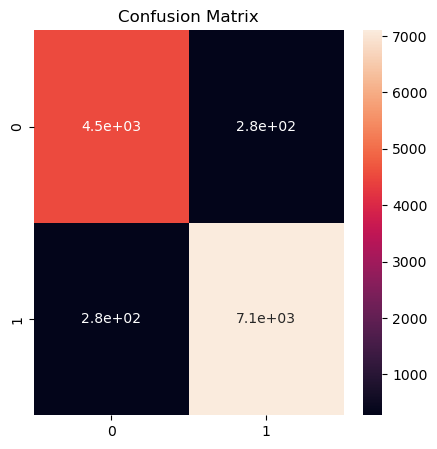

In [71]:
# Displays the logistic regression model confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)

# ---------------------------------------------------------------------------------------------------------------

# SVM

In [72]:
# Creates and traines the SVM model

from sklearn.svm import SVC

model_SVM = SVC(kernel='linear',random_state=1)

model_SVM.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

In [73]:
# Predict the X_test values

y_pred = model_SVM.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [74]:
# Displays the SVM model accuracy and F1 score

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

accuracy_list.append(str(accuracy))
f1_list.append(str(f1))
model_list.append('SVM')

Accuracy: 0.9540126239855726
F1 Score: 0.9619892946676605


<AxesSubplot:title={'center':'Confusion Matrix'}>

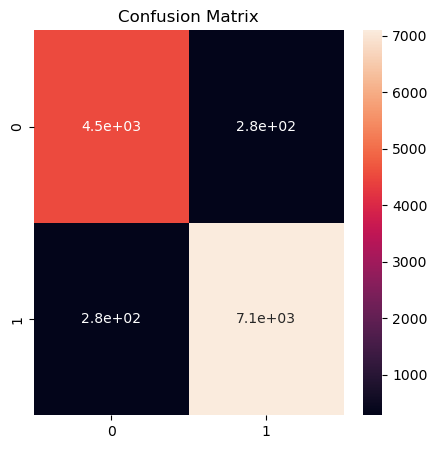

In [75]:
# Displays the SVM model confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)

# ---------------------------------------------------------------------------------------------------------------

# Naive Bayes

In [76]:
# Creates and traines the Naive Bayes model

from sklearn.naive_bayes import GaussianNB

model_Naive_Bayes = GaussianNB()

model_Naive_Bayes.fit(x_train, y_train)

GaussianNB()

In [77]:
# Predict the X_test values

y_pred = model_Naive_Bayes.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [78]:
# Displays the Naive Bayes model accuracy and F1 score

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

accuracy_list.append(str(accuracy))
f1_list.append(str(f1))
model_list.append('Naive Bayes')

Accuracy: 0.8614640544306911
F1 Score: 0.8850965460973619


<AxesSubplot:title={'center':'Confusion Matrix'}>

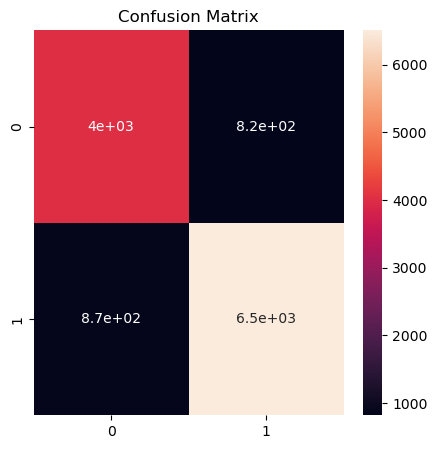

In [79]:
# Displays the Naive Bayes model confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)

# ---------------------------------------------------------------------------------------------------------------

# Gradient Boosting

In [80]:
# Creates and traines the Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier

model_Gradient_Boosting = GradientBoostingClassifier(random_state=1)

model_Gradient_Boosting.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [81]:
# Predict the X_test values

y_pred = model_Gradient_Boosting.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [82]:
# Displays the Gradient Boosting model accuracy and F1 score

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

accuracy_list.append(str(accuracy))
f1_list.append(str(f1))
model_list.append('Gradient Boosting')

Accuracy: 0.913845397163702
F1 Score: 0.9299006202894685


<AxesSubplot:title={'center':'Confusion Matrix'}>

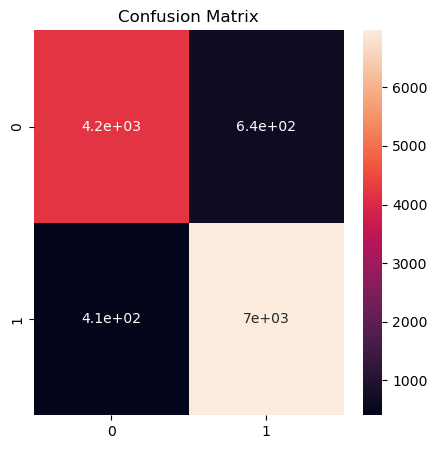

In [83]:
# Displays the Gradient Boosting model confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)

# ---------------------------------------------------------------------------------------------------------------

# X Gradient Boosting

In [84]:
# Creates and traines the XGB model

from xgboost import XGBClassifier

model_XGB =  XGBClassifier(random_state=1)

model_XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [85]:
# Predict the X_test values

y_pred = model_XGB.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [86]:
# Displays the XGB model accuracy and F1 score

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

accuracy_list.append(str(accuracy))
f1_list.append(str(f1))
model_list.append('X Gradient Boosting')

Accuracy: 0.940978768751537
F1 Score: 0.9512921120281423


<AxesSubplot:title={'center':'Confusion Matrix'}>

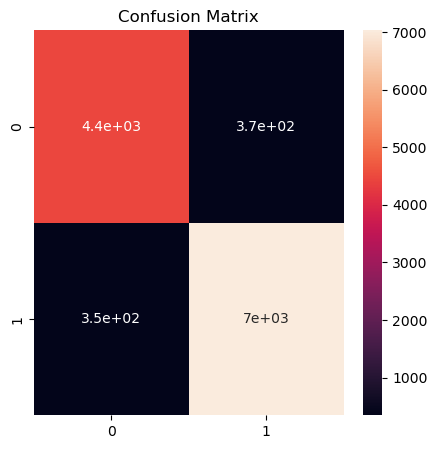

In [87]:
# Displays the XGB model confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)

# ---------------------------------------------------------------------------------------------------------------

# Light Gradient Boosting

In [88]:
# Creates and traines the LGB model

from lightgbm import LGBMClassifier

model_LGBM =  LGBMClassifier(random_state=1)

model_LGBM.fit(x_train, y_train)

LGBMClassifier(random_state=1)

In [89]:
# Predict the X_test values

y_pred = model_LGBM.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [90]:
# Displays the LGB model accuracy and F1 score

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

accuracy_list.append(str(accuracy))
f1_list.append(str(f1))
model_list.append('Light Gradient Boosting')

Accuracy: 0.9349126977621116
F1 Score: 0.9465103745621126


<AxesSubplot:title={'center':'Confusion Matrix'}>

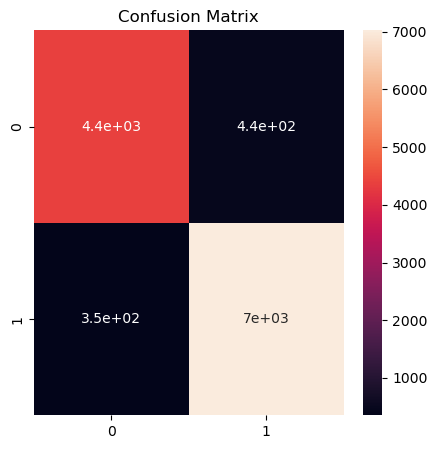

In [91]:
# Displays the LGB model confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)

# ---------------------------------------------------------------------------------------------------------------

# Random Forest

In [92]:
# Creates and traines the Random Forest model

from sklearn.ensemble import RandomForestClassifier

model_RF =  RandomForestClassifier(random_state=1)

model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [93]:
# Predict the X_test values

y_pred = model_RF.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [94]:
# Displays the Random Forest model accuracy and F1 score

from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: '+str(accuracy))
print('F1 Score: '+str(f1))

accuracy_list.append(str(accuracy))
f1_list.append(str(f1))
model_list.append('Random Forest')

Accuracy: 0.8932699401590294
F1 Score: 0.9132924880127864


<AxesSubplot:title={'center':'Confusion Matrix'}>

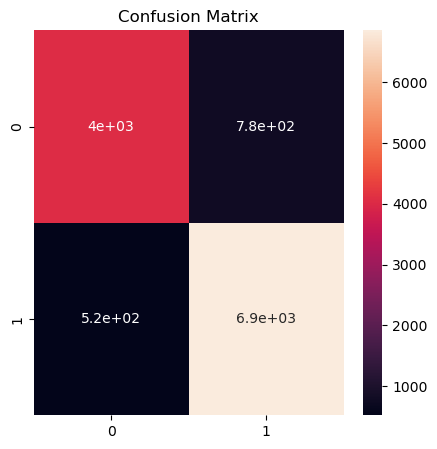

In [95]:
# Displays the Random Forest model confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)

# ---------------------------------------------------------------------------------------------------------------

# Random Forest - Different Parameters

In [96]:
# Implements the random forest model one more time, but with different parameters

from sklearn.ensemble import RandomForestClassifier

depth = [10, 50, 100, 500, 1000, 10000]
leaf = [20, 50, 100, 500, 1000, 10000]
n_estimators = [10, 20, 30, 50, 500, 1000, 10000]

for i,j,k in zip(depth, leaf, n_estimators):

    print('Depth = ', i)
    print('Leaf = ', j)
    modelo_RF = RandomForestClassifier(max_depth=i, max_leaf_nodes=j, n_estimators = k ,random_state=1)
    modelo_RF.fit(x_train, y_train)
    y_pred_train = modelo_RF.predict(x_train)
    y_pred_test = modelo_RF.predict(x_test)

    print('Accuracy: '+str(accuracy_score(y_test, y_pred_test)))
    print('F1 Score: '+str(f1_score(y_test, y_pred_test)))

Depth =  10
Leaf =  20
Accuracy: 0.8115419296663661
F1 Score: 0.8543369448140404
Depth =  50
Leaf =  50
Accuracy: 0.8386753012542012
F1 Score: 0.8727531359110305
Depth =  100
Leaf =  100
Accuracy: 0.8521190261496844
F1 Score: 0.8825826607654257
Depth =  500
Leaf =  500
Accuracy: 0.8777768669563079
F1 Score: 0.9016036428430014
Depth =  1000
Leaf =  1000
Accuracy: 0.8889253217476842
F1 Score: 0.9103064804395314
Depth =  10000
Leaf =  10000
Accuracy: 0.8963849495860317
F1 Score: 0.9159574468085108


# ---------------------------------------------------------------------------------------------------------------

# Accuracy and F1 Score Table

In [97]:
# Creates a table that organize the models and it's accuracy and F1 score

df_models = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list, 'F1 Score': f1_list})
df_models

,Model,Accuracy,F1 Score
0,Logistic Regression,0.9540945979178621,0.9620750372477312
1,SVM,0.9540126239855726,0.9619892946676605
2,Naive Bayes,0.8614640544306911,0.8850965460973619
3,Gradient Boosting,0.913845397163702,0.9299006202894685
4,X Gradient Boosting,0.940978768751537,0.9512921120281423
5,Light Gradient Boosting,0.9349126977621116,0.9465103745621126
6,Random Forest,0.8932699401590294,0.9132924880127864
